Develop a model to predict customer churn for a subscription-
based service or business. Use historical customer data, including

features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient

Boosting to predict churn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7768,7769,15726695,Hsia,601,Spain,Female,20,9,122446.61,2,1,0,86791.90,0
9144,9145,15731463,Gboliwe,818,Germany,Male,43,10,105301.50,1,1,1,78941.59,0
1033,1034,15695475,Maclean,645,France,Male,29,1,130131.08,2,0,1,196474.35,0
6487,6488,15574283,Padovano,580,France,Male,31,2,0.00,2,0,1,64014.24,0
1321,1322,15704483,Lorenzo,724,France,Male,40,6,0.00,2,0,0,106149.48,0


Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


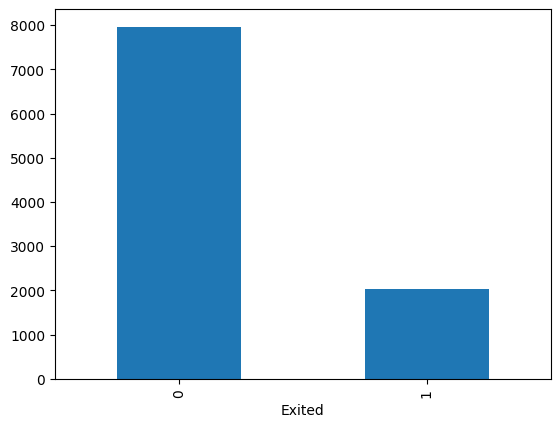

In [9]:
df["Exited"].value_counts().plot(kind="bar")
plt.show()

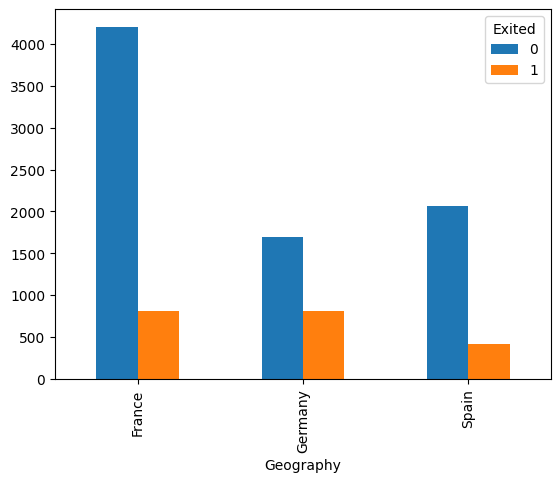

In [10]:
pd.crosstab(df["Geography"],df["Exited"]).plot(kind="bar")
plt.show()

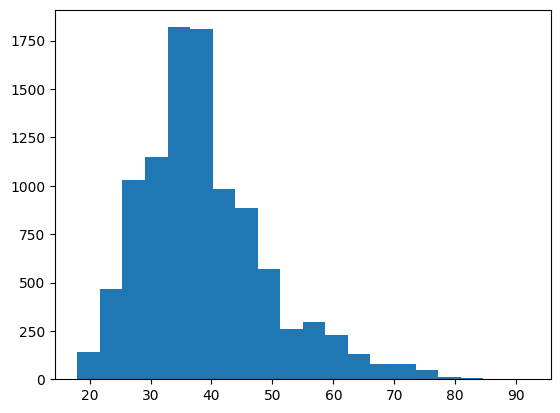

In [11]:
plt.hist(df["Age"], bins=20)
plt.show()

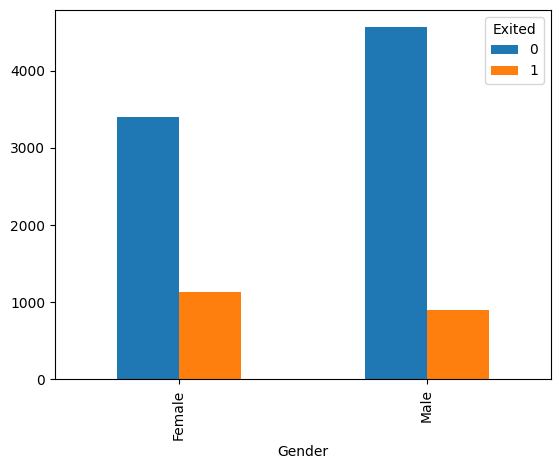

In [12]:
pd.crosstab(df["Gender"],df["Exited"]).plot(kind="bar")
plt.show()

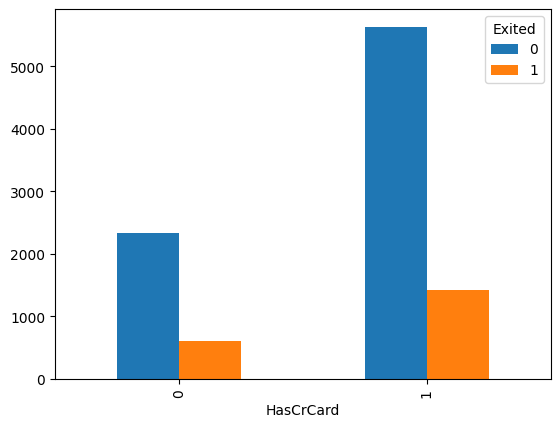

In [13]:
pd.crosstab(df["HasCrCard"],df["Exited"]).plot(kind="bar")
plt.show()

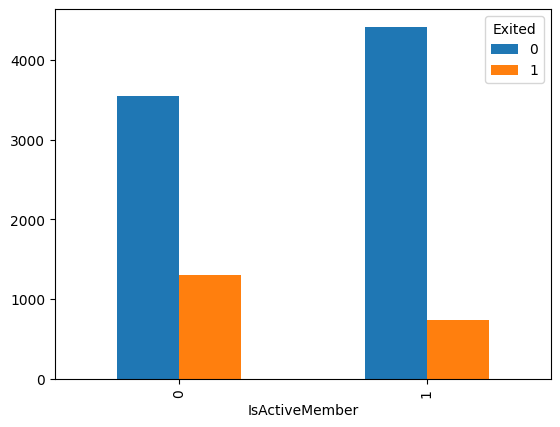

In [14]:
pd.crosstab(df["IsActiveMember"],df["Exited"]).plot(kind="bar")
plt.show()

In [15]:
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = df["Exited"]

In [16]:
X["Gender"] = X["Gender"].map({"Female": 0, "Male": 1})

In [17]:
X = pd.get_dummies(X, columns=["Geography"])

In [18]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [21]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_logistic = logistic.predict(X_test)

In [23]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.811


In [24]:
print(confusion_matrix(y_test, y_pred_logistic))

[[1543   64]
 [ 314   79]]


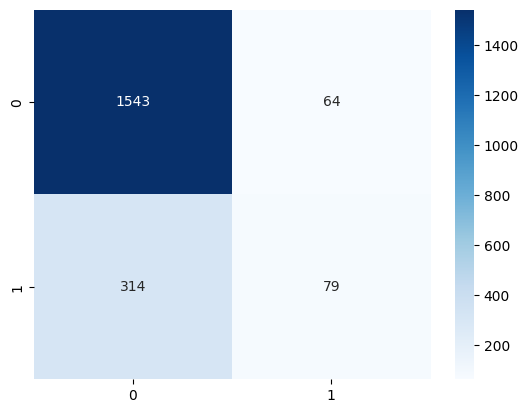

In [25]:
cm = confusion_matrix(y_test, y_pred_logistic)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_randomForest = random_forest.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_randomForest))

Random Forest Accuracy: 0.866


In [ ]:
print(confusion_matrix(y_test, y_pred_randomForest))

[[1547   60]
 [ 208  185]]


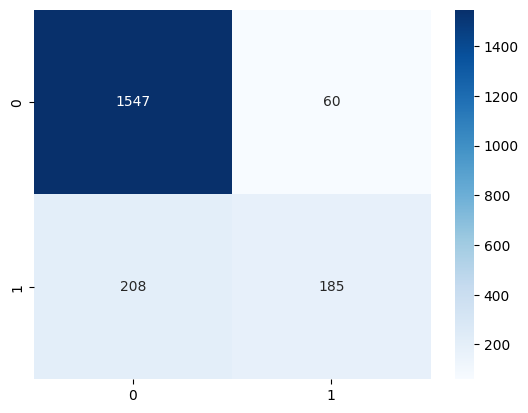

In [ ]:
cm = confusion_matrix(y_test, y_pred_randomForest)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_randomForest))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Gradient Boosting

In [ ]:
gradientBoosting = GradientBoostingClassifier()
gradientBoosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gradient = gradientBoosting.predict(X_test)

In [ ]:
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gradient))

Gradient Boosting Accuracy: 0.8645


In [ ]:
print(confusion_matrix(y_test, y_pred_gradient))

[[1542   65]
 [ 206  187]]


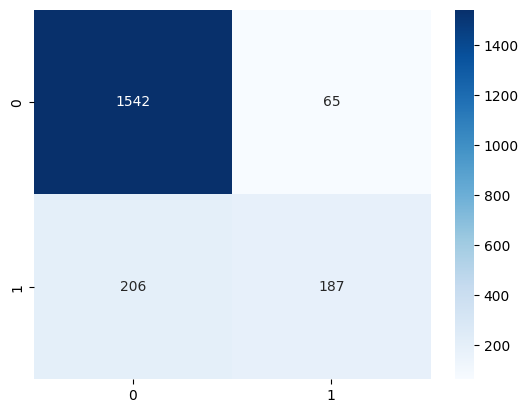

In [ ]:
cm = confusion_matrix(y_test, y_pred_gradient)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_gradient))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

